In [1]:
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metabolomics_data = pd.read_csv("../../AZ_data/Metabolite_data_combined.csv")
metabolomics_data = metabolomics_data.set_index("ionIdx")
metabolomics_data = metabolomics_data.drop("ionMz", axis =1)

In [3]:
celllines_mutations = pd.read_csv("../../GEMICCL/Mutation.csv", sep = "\t")
celllines_mapped = pd.read_csv("../../Cellosaurus_data/Celllines_mapped_manual.csv")

# Get only cell lines with ID
celllines_mapped = celllines_mapped.drop_duplicates(subset = ["dsIdx"])
celllines_mapped = celllines_mapped.dropna(subset = ["ID"])
sample_data_tissue = celllines_mapped["DI"].tolist()

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
celllines_list = celllines_mapped["ID"].unique().tolist()
celllines_notinmutationset = set(celllines_list) - set(celllines_mutations['CellLineName_Cellosaurus'])
celllines_mapped_mutations = celllines_mapped[~celllines_mapped["ID"].isin(celllines_notinmutationset)]

In [7]:
metabolic_assocations = pd.read_csv("./OLS_tissue_controlled_regressionTstats_noMCF7.csv", index_col = "Unnamed: 0")

In [13]:
splitcolumns = []
for item in metabolic_assocations.columns:
    splitcolumns.append(item.split("_")[1])

In [14]:
metabolic_assocations.columns = splitcolumns

In [30]:
top_associations = metabolic_assocations[metabolic_assocations > 8].stack().reset_index().sort_values(by = 0, ascending = False)
bottom_associations = metabolic_assocations[metabolic_assocations < -8].stack().reset_index().sort_values(by = 0, ascending = False)

In [31]:
gene_counts = pd.concat([top_associations["level_1"].value_counts(), -bottom_associations["level_1"].value_counts()])

In [32]:
top10_genecounts = pd.concat([gene_counts.sort_values().tail(10), gene_counts.sort_values().head(10)]).sort_values()

In [33]:
top10_genecounts = pd.DataFrame(top10_genecounts)

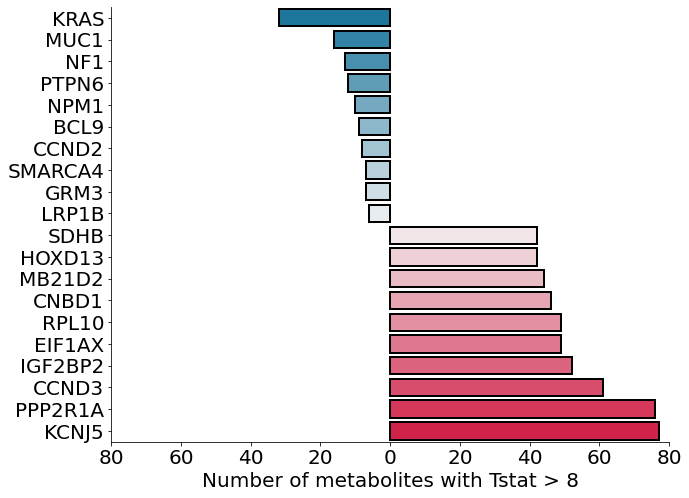

In [54]:
matplotlib.rcParams['figure.figsize'] = [10, 8]

palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, n=20)
g = sns.barplot(y = top10_genecounts.index, x = top10_genecounts["level_1"], palette = palette_cmap, linewidth = 2, edgecolor = "k")

g.set_xlabel("Number of metabolites with Tstat > 8", size = 20)

g.set_xlim(-80,80)
g.set_xticklabels([80,60,40,20,0,20,40,60,80], size = 20)

g.set_yticklabels(g.get_yticklabels(), size = 20)
sns.despine()

plt.savefig("Most_influencial_metabolites.pdf", bbox_inches = "tight")

In [40]:
top_associations = metabolic_assocations[metabolic_assocations > 5].stack().reset_index().sort_values(by = 0, ascending = False)
bottom_associations = metabolic_assocations[metabolic_assocations < -5].stack().reset_index().sort_values(by = 0, ascending = False)

In [41]:
sorted_associations = top_associations.sort_values(by = 0, ascending = True).tail(500)
sorted_associations2 = bottom_associations.sort_values(by = 0, ascending = True).reset_index().head(500)

In [42]:
sorted_associations = sorted_associations.reset_index()

In [43]:
sorted_associations.index +=(len(sorted_associations2))
sorted_associations.index +=125

In [44]:
combined_associations = pd.concat([sorted_associations, sorted_associations2])

In [45]:
sorted_associations2.head(50)

,index,level_0,level_1,0
0,1957,698,MUC1,-18.961
1,2129,722,MUC1,-18.670
2,2021,711,MUC1,-16.379
3,2299,739,MUC1,-13.532
4,2106,722,DDIT3,-13.479
5,2314,741,BCL9,-13.041
6,1935,698,DDIT3,-12.820
7,2444,752,MUC1,-12.560
8,3998,966,TRIM27,-12.348
9,2564,775,MUC1,-12.342


In [64]:
sorted_associations.tail(50)

,index,level_0,level_1,0
1075,19437,999,PPP2R1A,22.979
1076,3969,238,EED,23.046
1077,14428,765,SH2B3,23.165
1078,6716,372,CLP1,23.219
1079,14398,765,CDKN1B,23.455
1080,4208,245,CD79A,23.577
1081,4255,245,SLC45A3,23.767
1082,6094,339,EED,23.966
1083,20309,1038,CHCHD7,24.002
1084,19854,1015,NAB2,24.277


In [65]:
TP53 = combined_associations[combined_associations["level_1"] == "MUC1"]
H3F3 = combined_associations[combined_associations["level_1"] == "CCND2"]
NUTM2B = combined_associations[combined_associations["level_1"] == "NUTM2B"]
ATP2B3 = combined_associations[combined_associations["level_1"] == "H3F3A"]

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

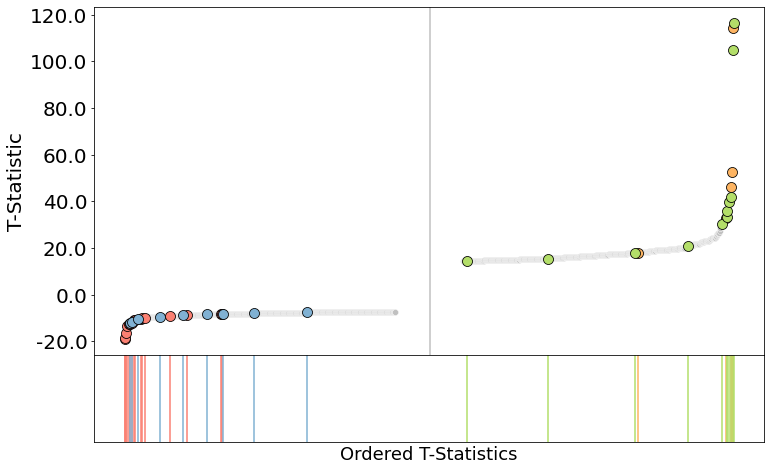

In [67]:

f, (ax_top, ax_bottom) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.8, .20)})
f.subplots_adjust(hspace = 0)

matplotlib.rcParams['figure.figsize'] = [12, 8]

g = sns.scatterplot(sorted_associations.index, sorted_associations[0], zorder = 1, lw = 3, color = "#C0C0C0", ax = ax_top)
g = sns.scatterplot(sorted_associations2.index, sorted_associations2[0], zorder = 1, lw = 3, color = "#C0C0C0", ax = ax_top)
g = sns.scatterplot(TP53.index, TP53[0], color = sns.color_palette("Set3", 10).as_hex()[3], zorder =2, s = 100, edgecolor = "k", ax = ax_top)
g = sns.scatterplot(H3F3.index, H3F3[0], color = sns.color_palette("Set3", 10).as_hex()[4], zorder =2, s = 100, edgecolor = "k", ax = ax_top)
g = sns.scatterplot(NUTM2B.index, NUTM2B[0], color = sns.color_palette("Set3", 10).as_hex()[5], zorder =2, s = 100, edgecolor = "k", ax = ax_top)
g = sns.scatterplot(ATP2B3.index, ATP2B3[0], color = sns.color_palette("Set3", 10).as_hex()[6], zorder =2, s = 100, edgecolor = "k", ax = ax_top)

for row,values in TP53.iterrows():
    ranking =(values.name)
    ax_bottom.axvline(ranking, c = sns.color_palette("Set3", 10).as_hex()[3])
    
for row,values in H3F3.iterrows():
    ranking =(values.name)
    ax_bottom.axvline(ranking, c = sns.color_palette("Set3", 10).as_hex()[4])
    
for row,values in NUTM2B.iterrows():
    ranking =(values.name)
    ax_bottom.axvline(ranking, c = sns.color_palette("Set3", 10).as_hex()[5])
    
for row,values in ATP2B3.iterrows():
    ranking =(values.name)
    ax_bottom.axvline(ranking, c = sns.color_palette("Set3", 10).as_hex()[6])
    
ax_bottom.set_yticks([])
ax_bottom.set_xticks([])
ax_bottom.set_xlabel("Ordered T-Statistics", size = 18)
ax_top.set_ylabel("T-Statistic", size = 20)

#ax_top.set_yticks([4, 4.5,5,5.5])

ax_top.set_yticklabels(ax_top.get_yticks(), size = 20)
ax_top.axvline((500+ 500+125)/2, color = "#C0C0C0")

plt.savefig("Tstat_order.pdf", bbox_inches = "tight")

In [80]:
glutamine = pd.DataFrame(metabolic_assocations.loc[115].sort_values())

In [81]:
glutamine["Gene"] = glutamine.index

In [82]:
glutamine = glutamine.reset_index()

In [105]:
glutamine.to_csv("Glutamine_ranking.csv")

In [95]:
matplotlib.rcParams['figure.figsize'] = [8, 6]

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


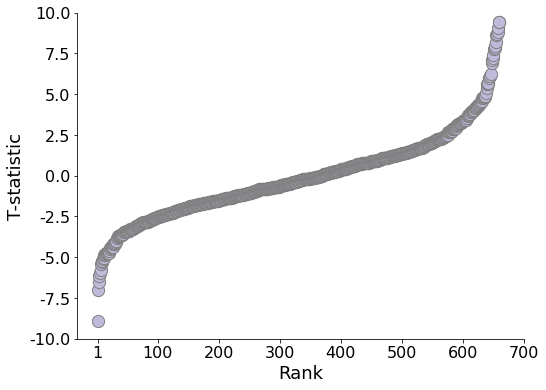

In [104]:
g = sns.scatterplot(glutamine.index+1, glutamine[115], zorder = 1, lw = 0.5, color = sns.color_palette("Set3").as_hex()[2]
                    , s = 150, edgecolor = "grey")

sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("T-statistic", size = 18)

g.set_ylim(-10,10)

g.set_xticks([1,100,200,300,400,500,600,700])
g.set_xticklabels([1,100,200,300,400,500,600,700], size = 16)

g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("Glutamine_tstats_ranking.pdf", bbox_inches = "tight")

In [108]:
glucose = pd.DataFrame(metabolic_assocations.loc[222].sort_values())
glucose["Gene"] = glucose.index
glucose = glucose.reset_index()

In [109]:
glucose

,index,222,Gene
0,ERBB2,-6.753,ERBB2
1,MNX1,-6.476,MNX1
2,SETDB1,-6.047,SETDB1
3,EP300,-5.742,EP300
4,EPHA7,-5.458,EPHA7
...,...,...,...
655,ZNF479,10.774,ZNF479
656,TRRAP,10.946,TRRAP
657,SGK1,11.288,SGK1
658,FOXL2,15.255,FOXL2


,A1CF,ABI1,ABL1,ABL2,ACSL3,ACSL6,ACVR1,ACVR2A,AFF1,AFF3,...,ZMYM3,ZNF331,ZNF384,ZNF429,ZNF479,ZNF521,ZNRF3,ZRSR2,STK11.1,KEAP1.1
1,0.512,-1.411,0.820,0.965,1.062,0.819,1.636,0.406,2.722,-0.033,...,0.709,0.146,-0.380,-0.068,2.859,-1.630,1.854,0.363,-0.696,-0.119
2,-0.717,0.131,-0.478,-0.526,-1.938,-1.302,0.695,0.664,-2.435,1.229,...,-0.598,-1.078,0.378,-0.007,0.488,0.858,-0.352,-0.813,0.320,-0.878
3,4.089,-1.856,2.502,2.380,0.433,0.437,1.715,0.913,1.878,0.053,...,1.354,-1.655,0.865,0.899,1.003,3.796,3.286,2.629,-0.280,2.450
4,2.491,-1.549,1.566,0.412,1.760,-0.144,0.205,0.515,3.425,0.119,...,0.903,-0.927,0.194,0.948,1.234,0.376,1.619,1.253,-0.132,0.753
5,1.690,-1.875,-1.367,-0.445,0.498,-3.144,3.060,-1.079,2.092,-0.496,...,0.426,-0.249,-0.382,0.765,0.269,-1.725,0.790,-0.955,0.464,1.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.478,-0.983,2.628,-0.130,2.124,3.727,-1.970,-0.691,-2.864,-1.769,...,-1.567,1.667,0.374,4.238,1.901,-2.139,-0.182,-0.500,5.101,-1.182
1096,3.084,-3.491,-0.026,0.319,-1.155,2.897,-3.322,-3.216,-2.406,-2.742,...,-1.524,4.066,-0.121,-0.538,-1.456,-2.254,-0.281,0.011,-1.999,-1.700
1097,-1.422,-1.013,-1.836,8.034,-2.382,-3.233,2.700,0.218,1.093,-0.351,...,-2.770,7.673,-2.782,-0.686,1.912,-1.992,-1.927,-1.477,6.480,7.699
1098,0.493,-0.783,1.186,1.395,2.422,2.337,-3.228,-2.723,-1.300,-0.236,...,-2.038,2.777,1.432,7.701,-0.390,3.943,2.689,-1.609,1.319,0.862
